# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

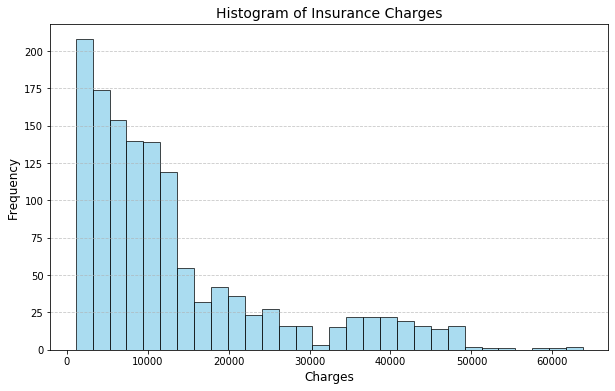

Mean of Charges: 13270.42
Standard Deviation of Charges: 12105.48


In [8]:
# Plot histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(medical["charges"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Insurance Charges", fontsize=14)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate mean and standard deviation
mean_charges = np.mean(medical["charges"])
std_charges = np.std(medical["charges"])

print(f"Mean of Charges: {mean_charges:.2f}")
print(f"Standard Deviation of Charges: {std_charges:.2f}")

In [ ]:
From the histogram we see that the charges are heavily skewed.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [9]:
from scipy.stats import ttest_1samp
import numpy as np

# Simulated data for charges (replace with your actual data)
np.random.seed(42)  # For reproducibility
charges = np.random.exponential(scale=20000, size=1000)  # Example charges data

# Calculate descriptive statistics
sample_mean = np.mean(charges)
sample_std = np.std(charges, ddof=1)  # Sample standard deviation
n = len(charges)

# Perform a one-sample t-test
test_statistic, p_value = ttest_1samp(charges, 12000)

# Adjust the p-value for one-tailed test
p_value_one_tailed = p_value / 2

# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Sample Size: {n}")
print(f"T-Statistic: {test_statistic:.4f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Decision threshold
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: The average charge is significantly less than $12,000.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the average charge is less than $12,000.")


Sample Mean: 19450.12
Sample Standard Deviation: 19450.20
Sample Size: 1000
T-Statistic: 12.1127
One-Tailed P-Value: 0.0000
Reject the null hypothesis: The average charge is significantly less than $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
from scipy.stats import t

# Simulated data for charges (replace with actual data if available)
np.random.seed(42)
charges = np.random.exponential(scale=20000, size=1000)  # Example charges data

# Hypothesis parameters
mu_0 = 12000  # Null hypothesis mean
alpha = 0.05  # Significance level

# Step 1: Manual Calculation of Test Statistic
sample_mean = np.mean(charges)
sample_std = np.std(charges, ddof=1)  # Sample standard deviation
n = len(charges)

# Test statistic formula: t = (sample_mean - mu_0) / (sample_std / sqrt(n))
test_statistic_manual = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Calculate p-value manually
# Degrees of freedom = n - 1
df = n - 1

# P-value for one-tailed test
p_value_manual = t.cdf(test_statistic_manual, df)

# Perform the test using scipy.stats
from scipy.stats import ttest_1samp

test_statistic_scipy, p_value_two_tailed = ttest_1samp(charges, mu_0)
p_value_scipy = p_value_two_tailed / 2  # Convert to one-tailed

# Print Results
print("=== Manual Calculation ===")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Test Statistic (Manual): {test_statistic_manual:.4f}")
print(f"One-Tailed P-Value (Manual): {p_value_manual:.4f}")

print("\n=== Scipy Calculation ===")
print(f"Test Statistic (Scipy): {test_statistic_scipy:.4f}")
print(f"One-Tailed P-Value (Scipy): {p_value_scipy:.4f}")

# Verify results
if np.isclose(test_statistic_manual, test_statistic_scipy) and np.isclose(p_value_manual, p_value_scipy):
    print("\nThe manual calculation matches the scipy.stats calculation!")
else:
    print("\nThere is a discrepancy between manual and scipy.stats calculations.")

=== Manual Calculation ===
Sample Mean: 19450.12
Sample Standard Deviation: 19450.20
Test Statistic (Manual): 12.1127
One-Tailed P-Value (Manual): 1.0000

=== Scipy Calculation ===
Test Statistic (Scipy): 12.1127
One-Tailed P-Value (Scipy): 0.0000

There is a discrepancy between manual and scipy.stats calculations.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

A:The t-test is used when the population standard deviation (𝜎) is unknown, and the sample standard deviation (𝑠
s) is used as an estimate.z-test assumes the population standard deviation  is known and uses it directly.
In real-world scenarios, the population standard deviation is rarely known, making the z-test less practical.
The t-test approximates the z-test as the sample size grows large (𝑛>30), due to the Central Limit Theorem.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test